##@GRIPAPRIL2023: The Sparks Foundation


###Author : BABLU PRASAD

###TASK 1 : Prediction using Supervised ML

To Predict the percentage of marks of the students based on the number of hours they studied

Dataset used: http://bit.ly/w-data

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
# reading csv file 
data = pd.read_csv ('/content/Student_data.csv')

# display sample data read from provided data set
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Check if there any null value in the Dataset
data.isnull == True

False

**Visualization the Data**

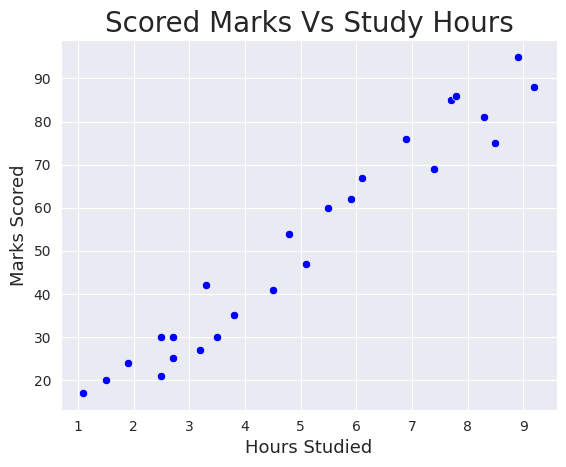

In [4]:
# Set the style theme of the graph plot
sns.set_style('darkgrid')

# Provide the data from the sample data to the x and y axes for a scatter plot graph
sns.scatterplot(y= data['Scores'], x= data['Hours'],c='blue')

# Set the graph title
plt.title('Scored Marks Vs Study Hours',size=20)

# Set the y-axis label 
plt.ylabel('Marks Scored', size=13)

# Set the x-axis label
plt.xlabel('Hours Studied', size=13)

# Display the graph
plt.show()

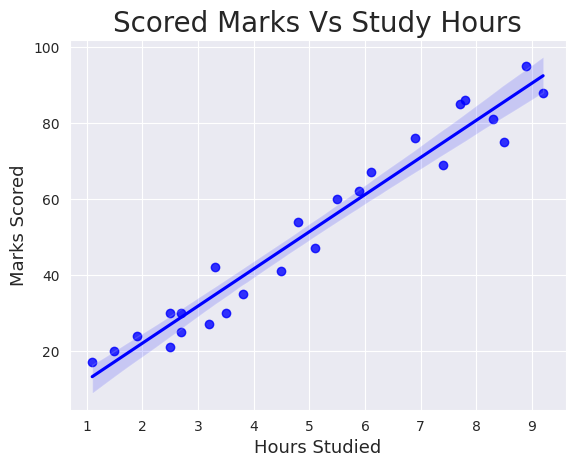



           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [5]:
# Provide the data from the sample data to the x and y axes for a regression plot graph
sns.regplot(x= data['Hours'], y= data['Scores'],color='blue')

# Set the graph title with 20 font size
plt.title('Scored Marks Vs Study Hours',size=20)

# Set the y-axis label with 13 font size
plt.ylabel('Marks Scored', size=13)

# Set the x-axis label with 13 font size
plt.xlabel('Hours Studied', size=13)

# Display the graph
plt.show()

print("\n")

# Display the correlation in the sample data
print(data.corr())

Note: Variables are positively correlated.

###Training the Model


**1) Splitting the Data**

In [6]:
# Extract Hours (independent) column values from the data
X = data.iloc[:, :-1].values

# Extract Marks (dependent) column values from the data
y = data.iloc[:, 1].values

# Split the Data into training and testing data
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

# Checking shapes of the splits.
print("X_train shape",train_X.shape, "\ny_train shape", train_y.shape, "\nX_test shape",test_X.shape, "\ny_test shape",test_y.shape)

X_train shape (18, 1) 
y_train shape (18,) 
X_test shape (7, 1) 
y_test shape (7,)


**2) Fitting the Data into the model**

In [7]:
# Create a linear regression model object
regression = LinearRegression()

# Provide training data for the model to learn
regression.fit(train_X, train_y)
print("--------Model Trained---------")

--------Model Trained---------


###Predicting the Percentage of Marks

In [8]:
# prediction
pred_y = regression.predict(test_X)

# creating dataframe of predicted marks respect to study hour
prediction = pd.DataFrame({'Hours': [i[0] for i in test_X], 'Predicted Marks': [m for m in pred_y]})
print(prediction)

   Hours  Predicted Marks
0    1.5        16.844722
1    3.2        33.745575
2    7.4        75.500624
3    2.5        26.786400
4    5.9        60.588106
5    3.8        39.710582
6    1.9        20.821393


###Comparing the Predicted Marks with the Actual Marks

   Actual Marks  Predicted Marks
0            20        16.844722
1            27        33.745575
2            69        75.500624
3            30        26.786400
4            62        60.588106
5            35        39.710582
6            24        20.821393





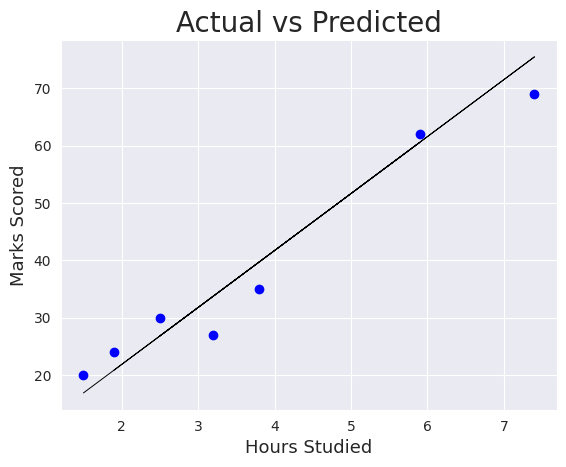

In [9]:
#creating dataframe of actual marks and predicted marks
compare_scores = pd.DataFrame({'Actual Marks': test_y, 'Predicted Marks': pred_y})
print(compare_scores)

print("\n\n")

# scatter plot graph of test dataset
plt.scatter(x=test_X, y=test_y, color='blue')

# Plot graph of predicted value for hour of study
plt.plot(test_X, pred_y, color='Black',linewidth=0.7)

# Set the graph title 
plt.title('Actual vs Predicted', size=20)

# Set the y-axis label
plt.ylabel('Marks Scored', size=13)

# Set the x-axis label 
plt.xlabel('Hours Studied', size=13)

# Display the graph
plt.show()


###Evaluating the Model

In [10]:
# Calculating the accuracy of the model
print("R_square of the model Test", r2_score(test_y,pred_y))

R_square of the model Test 0.9367661043365056


* The near the value of R^2 score to 1 the better the model is.

In [11]:
print("Mean Absolute Error of test",mean_absolute_error(test_y,pred_y))

Mean Absolute Error of test 4.130879918502482


* Smaller the value of 'Mean Absolute Error'--> better the model



In [12]:
print("Accuracy of model : ",regression.score(test_X,test_y)*100)

Accuracy of model :  93.67661043365057


**Problem Statement(s) :**

What will be the predicted score if a student studies for 9.25 hrs/ day?

In [13]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893
